11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Train set (0 vs 1): (12665, 28, 28)
Test set (0 vs 1): (2115, 28, 28)


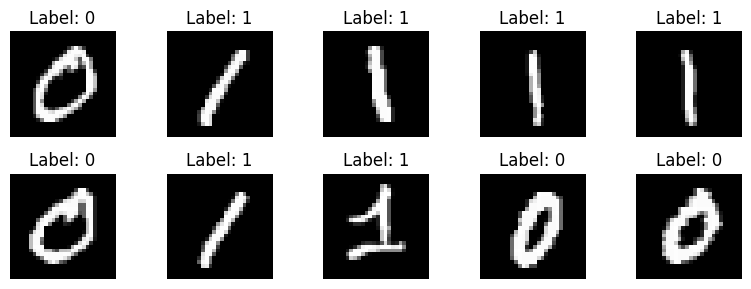

New shape of X_train: (12665, 784)
New shape of X_test: (2115, 784)

K-Fold Cross Validation Results:
Fold Accuracies: [0.99842084 0.99921042 0.99960521 0.9964469  0.99921042]
Mean Accuracy: 99.86%
Standard Deviation: 0.11%

Model training completed!

Test Accuracy: 99.95%

Confusion Matrix:
 [[ 979    1]
 [   0 1135]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



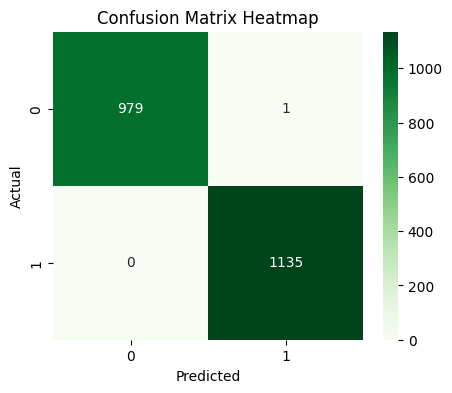

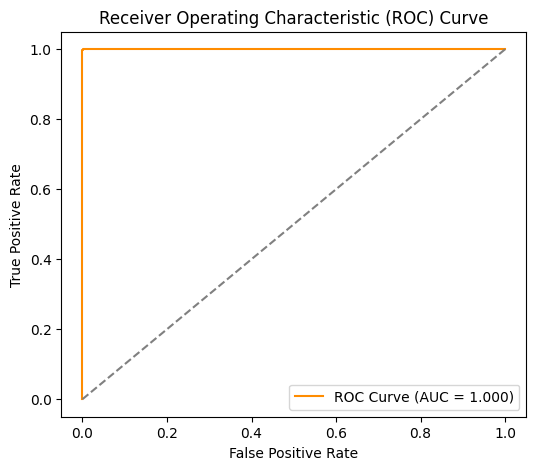

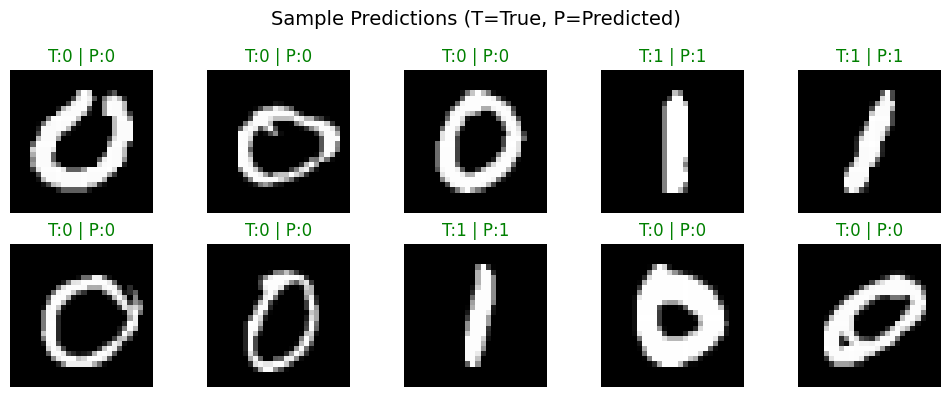

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist


(X_train_full, y_train_full), (X_test_full, y_test_full) = mnist.load_data()

print("Train shape:", X_train_full.shape)
print("Test shape:", X_test_full.shape)


train_filter = np.where((y_train_full == 0) | (y_train_full == 1))
test_filter  = np.where((y_test_full == 0) | (y_test_full == 1))

X_train, y_train = X_train_full[train_filter], y_train_full[train_filter]
X_test, y_test   = X_test_full[test_filter], y_test_full[test_filter]

print("Train set (0 vs 1):", X_train.shape)
print("Test set (0 vs 1):", X_test.shape)


plt.figure(figsize=(8,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test  = X_test.reshape(X_test.shape[0], -1) / 255.0

print("New shape of X_train:", X_train.shape)
print("New shape of X_test:", X_test.shape)


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

model = LogisticRegression(max_iter=1000)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

print("\nK-Fold Cross Validation Results:")
print(f"Fold Accuracies: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores)*100:.2f}%")
print(f"Standard Deviation: {np.std(cv_scores)*100:.2f}%")


model.fit(X_train, y_train)
print("\nModel training completed!")


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {acc*100:.2f}%")


cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


print("\nClassification Report:\n", classification_report(y_test, y_pred))


plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


from sklearn.metrics import roc_curve, roc_auc_score


y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


import random

plt.figure(figsize=(10,4))
for i in range(10):
    idx = random.randint(0, len(X_test)-1)
    img = X_test[idx].reshape(28,28)
    true_label = y_test[idx]
    pred_label = y_pred[idx]

    plt.subplot(2,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"T:{true_label} | P:{pred_label}",
              color='green' if true_label == pred_label else 'red')
    plt.axis('off')

plt.suptitle("Sample Predictions (T=True, P=Predicted)", fontsize=14)
plt.tight_layout()
plt.show()
